<a href="https://colab.research.google.com/github/Sachinthana-Pathiranage/Machine_Larning_CM2604_Bank_Data/blob/main/ML_CW_AI%26DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis and Predictive Modeling for Classification Tasks Using Machine Learning and Neural Networks

---

# Name - Sachinthana

# RGU - 2330931

# IIT - 20231122

In [ ]:
# Import essential libraries for data processing and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import statistical tools
from scipy.stats import chi2_contingency

# Data preprocessing utilities
from sklearn.preprocessing import LabelEncoder

# Resampling technique for imbalanced datasets
from imblearn.over_sampling import SMOTE

# Splitting datasets into training and testing sets
from sklearn.model_selection import train_test_split

# Importing machine learning models
from sklearn.ensemble import RandomForestClassifier

# Metrics for model performance evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer

# Deep learning framework
from keras.models import Sequential
from keras.layers import Dense
from keras import Input


# Exploratory Data Analysis (EDA) for Banking Dataset

In [ ]:
### Exploratory Data Analysis (EDA) ###
# Step 1: Load and Examine the Dataset

# Read the dataset from a CSV file using ';' as a delimiter
bank_data = pd.read_csv('bank-full.csv', sep=';')

# Display the first few rows of the dataset
print(bank_data.head())

# Print the data types of all columns
print(bank_data.info())

# Display the number of rows and columns in the dataset
print("Dataset dimensions: ", bank_data.shape)


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

Check for Missing Values

In [ ]:
# Step 1: Check for Missing Values
missing_values = bank_data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Identify Categorical and Numerical Features

In [ ]:
# Step 2: Identify Categorical and Numerical Features
# Extract categorical columns, excluding the target variable
categorical_cols = bank_data.select_dtypes(include='object').columns[:-1]
print("Categorical Features:", categorical_cols.tolist())

# Extract numerical columns
numeric_cols = bank_data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features:", numeric_cols.tolist())


Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Separate Discrete and Continuous Features

In [ ]:
# Step 3: Separate Discrete and Continuous Features
discrete_cols = [col for col in numeric_cols if bank_data[col].nunique() <= 25]
continuous_cols = [col for col in numeric_cols if bank_data[col].nunique() > 25]

print("Discrete Numerical Features:", discrete_cols)
print("Continuous Numerical Features:", continuous_cols)


Discrete Numerical Features: []
Continuous Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Analyze Unique Values for Specific Features

In [ ]:
# Step 4: Analyze Unique Values in 'day'
print("Unique Days Count:", bank_data['day'].nunique())
print("Sorted Unique Days:", np.array(sorted(bank_data['day'].unique())))


Unique Days Count: 31
Sorted Unique Days: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


Frequency Counts for Categorical Features

In [ ]:
# Step 5: Frequency Counts for Categorical Features
for column in categorical_cols:
    print(f"\n{column} Value Counts:\n{bank_data[column].value_counts()}")



job Value Counts:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

marital Value Counts:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

education Value Counts:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

default Value Counts:
default
no     44396
yes      815
Name: count, dtype: int64

housing Value Counts:
housing
yes    25130
no     20081
Name: count, dtype: int64

loan Value Counts:
loan
no     37967
yes     7244
Name: count, dtype: int64

contact Value Counts:
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

month Value Counts:
month
may    13766
jul     6895
aug     6247
jun     5341
nov

Visualize Categorical Feature Distributions

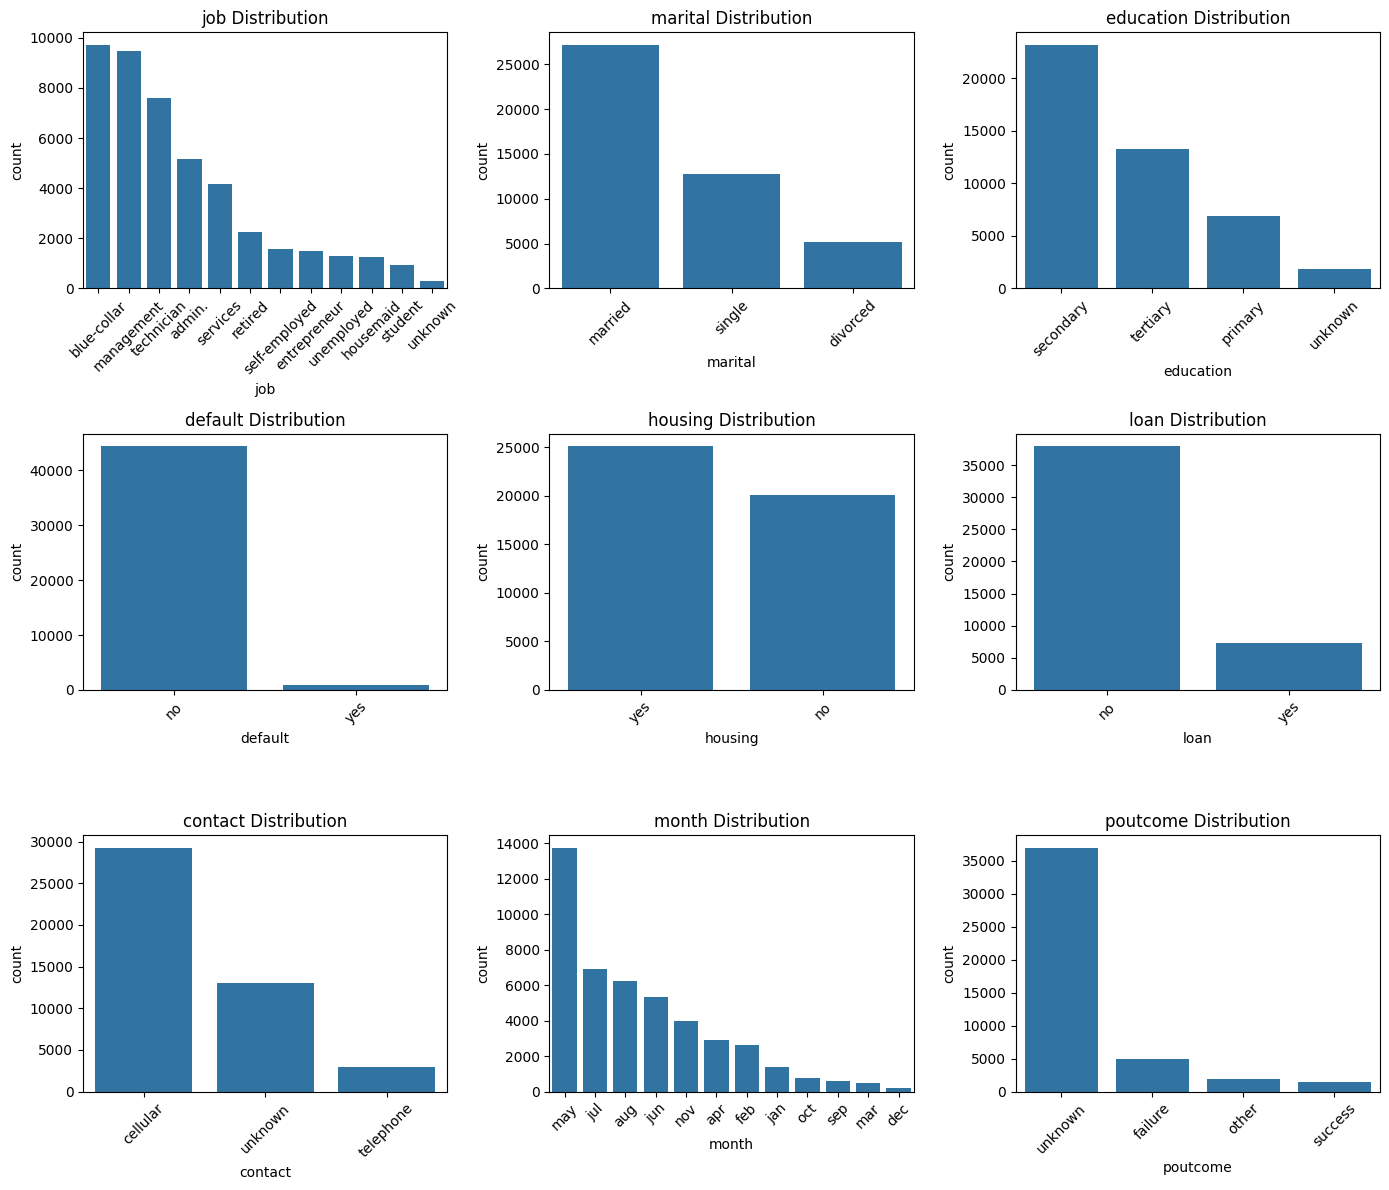

In [ ]:
# Step 6: Visualizing Categorical Feature Distributions
fig, axs = plt.subplots(3, 3, figsize=(14, 12))
axs = axs.flatten()

for idx, col in enumerate(categorical_cols):
    sns.countplot(data=bank_data, x=col, order=bank_data[col].value_counts().index, ax=axs[idx])
    axs[idx].set_title(f"{col} Distribution")
    axs[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


 Summary Statistics for Numerical Features

In [ ]:
# Step 7: Descriptive Statistics for Numerical Features
print("Numerical Features Summary:\n", bank_data.describe())


Numerical Features Summary:
                 age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000 

Visualize Continuous Feature Distributions

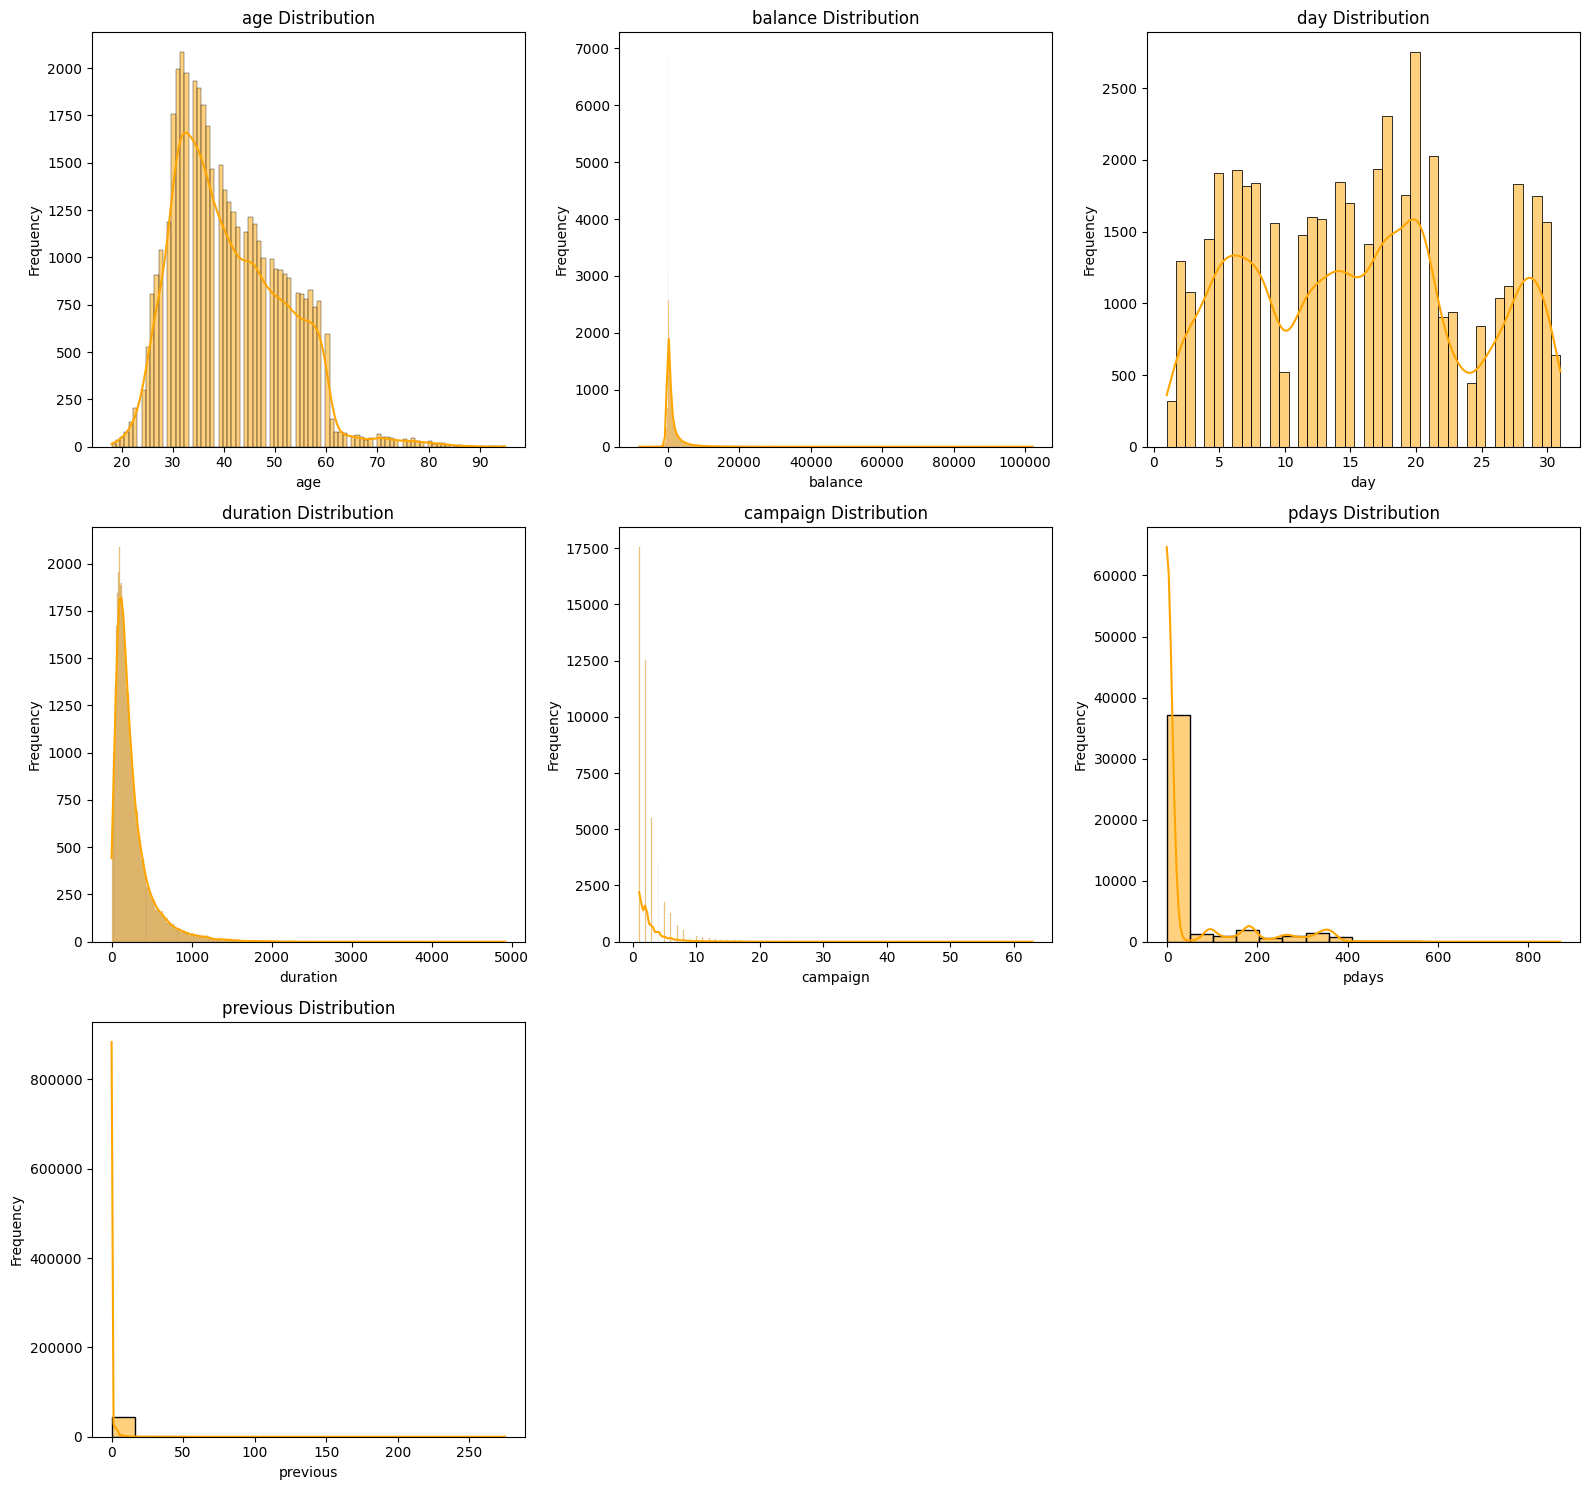

In [ ]:
# Step 8: Continuous Feature Distributions (Corrected)
import math

# Dynamically calculate the number of rows and columns needed for subplots
num_features = len(continuous_cols)
rows = math.ceil(num_features / 3)  # Assuming 3 columns per row

fig, axes = plt.subplots(rows, 3, figsize=(16, rows * 5))  # Adjust grid size based on features
axes = axes.flatten()  # Flatten axes array for easier indexing

# Plot histograms with KDE for each continuous feature
for i, col in enumerate(continuous_cols):
    sns.histplot(bank_data[col], kde=True, color='orange', ax=axes[i])
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Turn off any unused axes
for j in range(num_features, len(axes)):
    axes[j].axis('off')

# Adjust layout to make sure all plots fit well
plt.tight_layout()
plt.show()

Analyze and Plot Discrete Numerical Features (e.g., 'day')

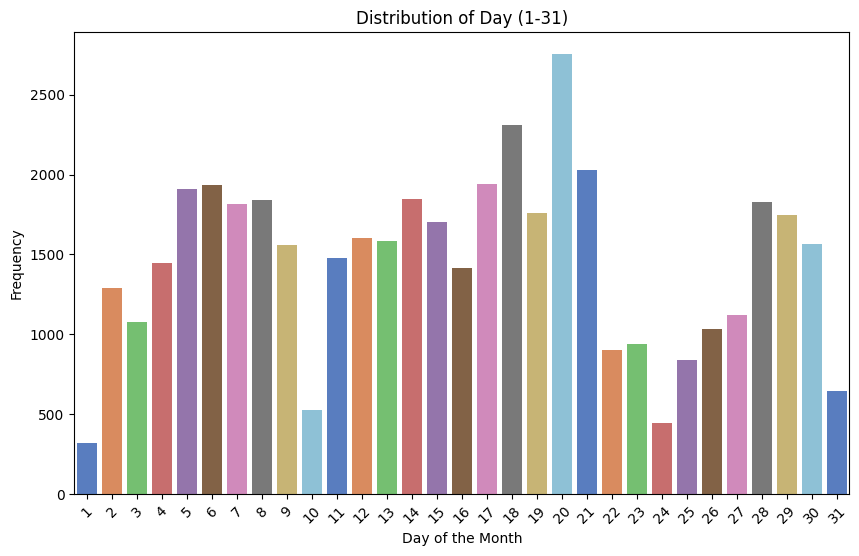

In [ ]:
# Step 9: Analyze 'day' Feature Distribution (Corrected)
plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=bank_data, hue='day', palette='muted', legend=False)
plt.title("Distribution of Day (1-31)")
plt.xlabel("Day of the Month")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


Outlier Detection with Boxplots

<ipython-input-25-bd59902aebb9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_data, y=feature, ax=axes[i], palette="coolwarm")
<ipython-input-25-bd59902aebb9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_data, y=feature, ax=axes[i], palette="coolwarm")
<ipython-input-25-bd59902aebb9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_data, y=feature, ax=axes[i], palette="coolwarm")
<ipython-input-25-bd59902aebb9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

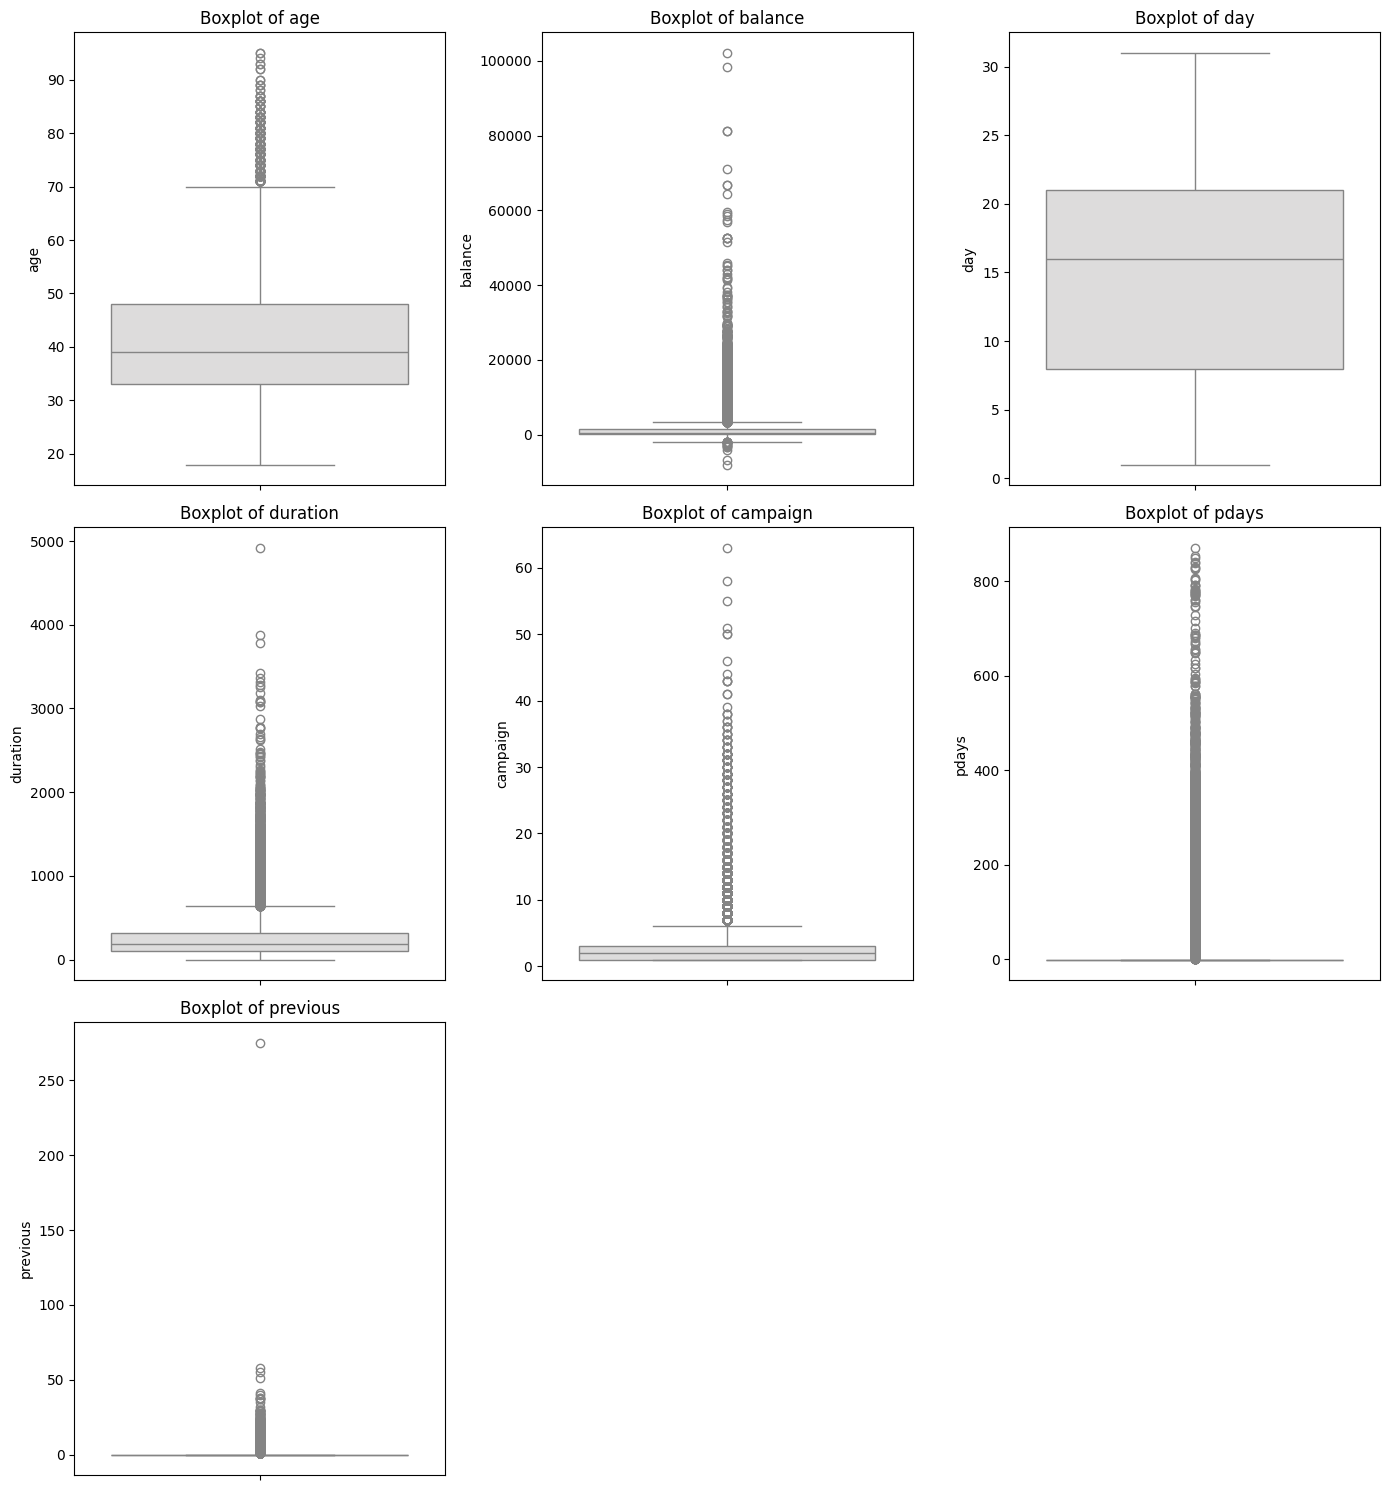

In [ ]:
# 10. Outlier Detection (Boxplots)
numerical_features = numeric_cols
num_features = len(numerical_features)
rows = math.ceil(num_features / 3)
fig, axes = plt.subplots(rows, 3, figsize=(14, rows * 5))
axes = axes.flatten()
for i, feature in enumerate(numeric_cols):
    sns.boxplot(data=bank_data, y=feature, ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"Boxplot of {feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(feature)
for j in range(num_features, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

Correlation Analysis for Numerical Features

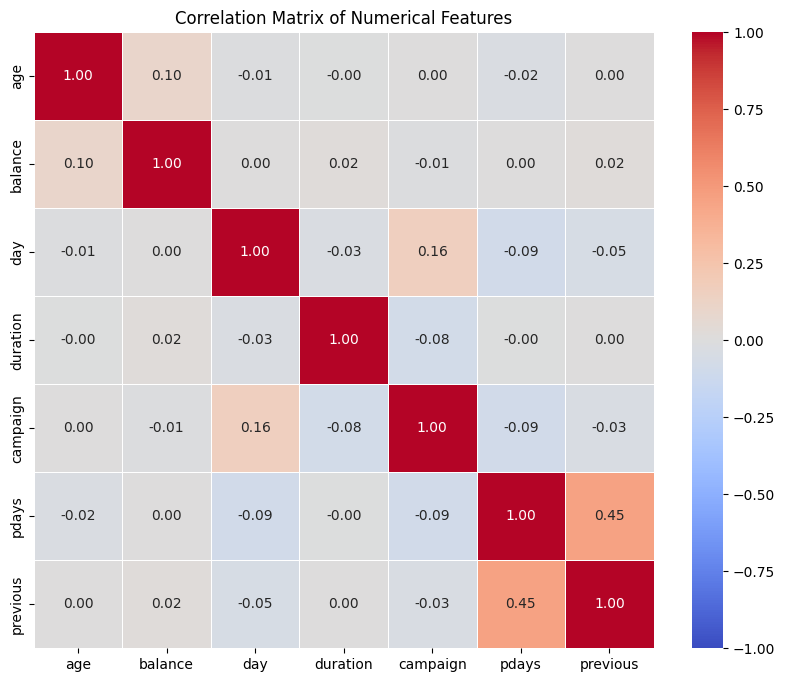

In [ ]:
# Compute the correlation matrix for numerical features
correlation_matrix = bank_data[numerical_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


 Cramér's V for Categorical Features

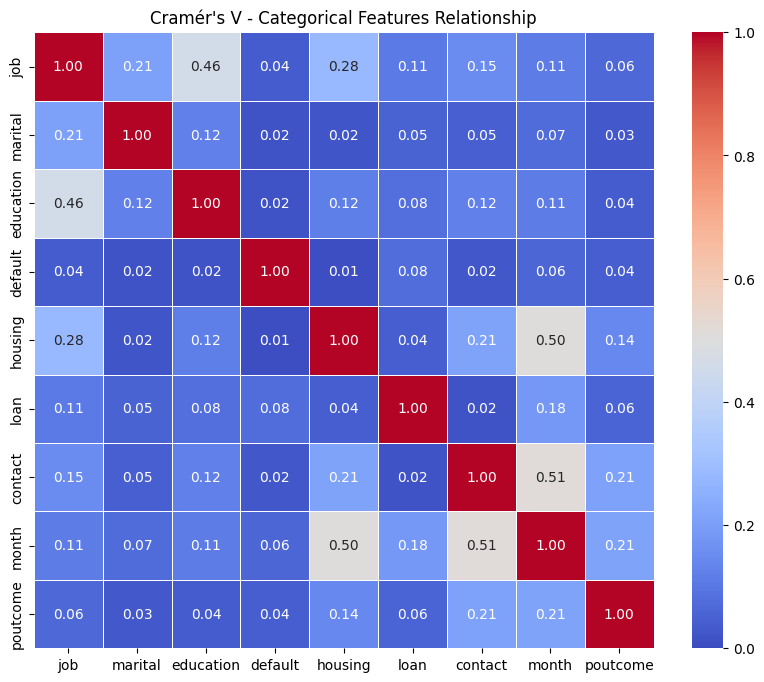

In [ ]:
# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()  # Ensure 'n' is a scalar by using sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / (min(k - 1, r - 1))) if chi2 > 0 else 0  # Return a scalar value

# Initialize a matrix for Cramér's V values
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_cols), len(categorical_cols))),
                                index=categorical_cols, columns=categorical_cols)

# Populate the matrix
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            contingency_table = pd.crosstab(bank_data[col1], bank_data[col2])
            # Change here: Assign the scalar value directly to the cell
            cramers_v_matrix.at[col1, col2] = cramers_v(contingency_table)
        else:
            cramers_v_matrix.at[col1, col2] = 1.0  # Change here as well

# Visualize Cramér's V matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=0, vmax=1)
plt.title("Cramér's V - Categorical Features Relationship")
plt.show()

Check for Duplicate Records

In [ ]:
# Count duplicate records
num_duplicates = bank_data.duplicated().sum()
print(f"Number of duplicate records: {num_duplicates}")


Number of duplicate records: 0


Target Class Distribution

Target Value Counts:
y
no     39922
yes     5289
Name: count, dtype: int64

Target Proportions (%):
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


<ipython-input-38-feec44f41310>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")


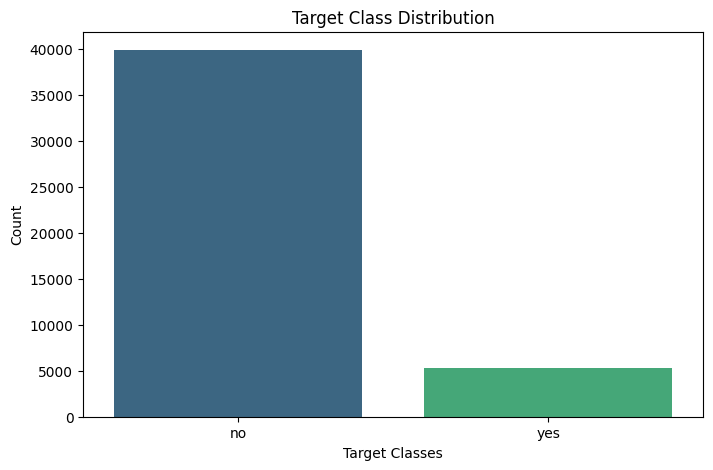

In [ ]:
# Count and percentage distribution of target classes
target_counts = bank_data['y'].value_counts()
target_percentage = bank_data['y'].value_counts(normalize=True) * 100

# Display results
print("Target Value Counts:")
print(target_counts)
print("\nTarget Proportions (%):")
print(target_percentage)

# Visualize the target class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")
plt.title("Target Class Distribution")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()


Feature Relationship with Target Variable

A. Categorical Features

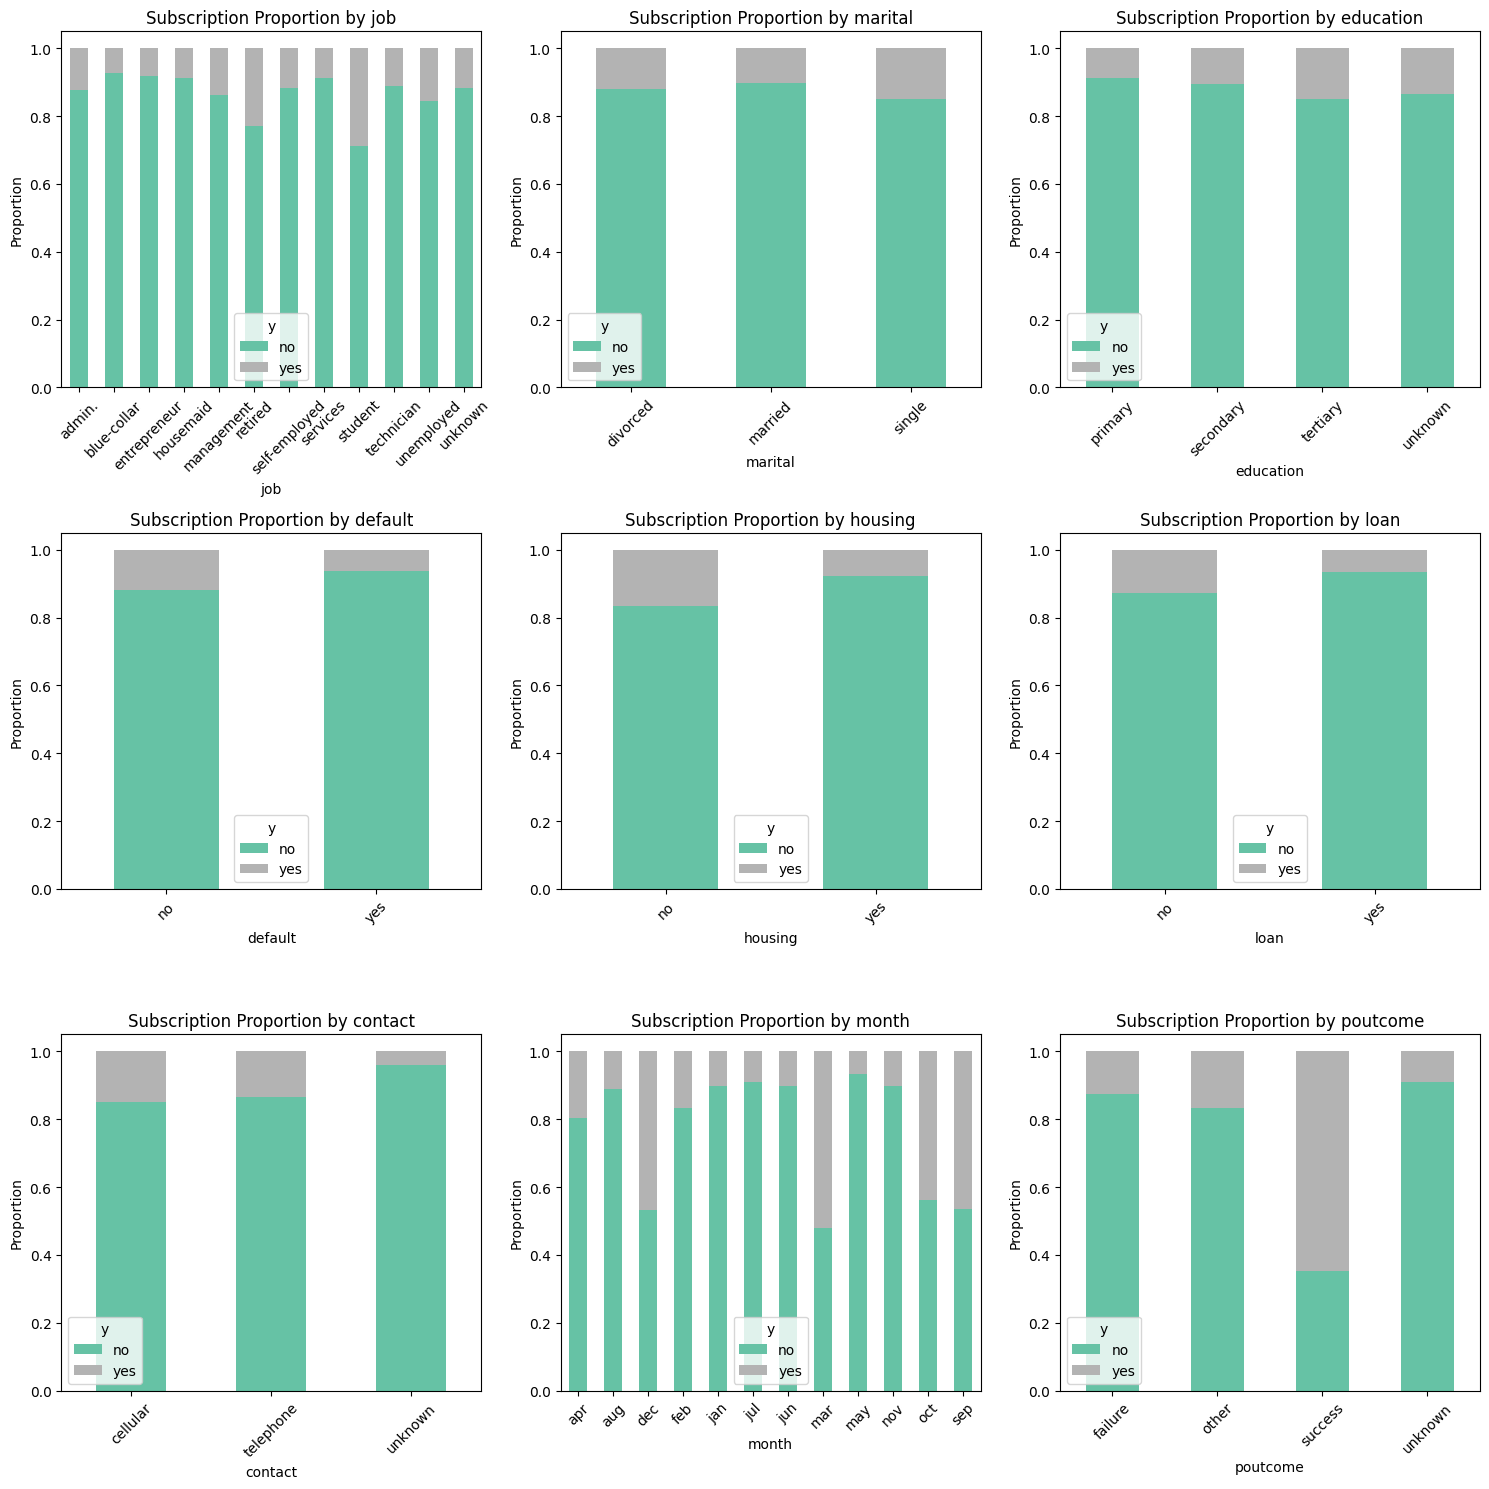

In [ ]:
# Create subplots dynamically
rows = math.ceil(len(categorical_cols) / 3)
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))
axes = axes.flatten()

# Plot relationships for each categorical feature
for i, feature in enumerate(categorical_cols):
    cross_tab = pd.crosstab(bank_data[feature], bank_data['y'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set2')
    axes[i].set_title(f"Subscription Proportion by {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Proportion")
    axes[i].tick_params(axis='x', rotation=45)

# Turn off unused axes
for j in range(len(categorical_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


B. Numerical Features

<ipython-input-47-9f396b1662aa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_data, x='y', y=feature, ax=axes[i], palette="coolwarm")
<ipython-input-47-9f396b1662aa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_data, x='y', y=feature, ax=axes[i], palette="coolwarm")
<ipython-input-47-9f396b1662aa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_data, x='y', y=feature, ax=axes[i], palette="coolwarm")
<ipython-input-47-9f396b1662aa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecate

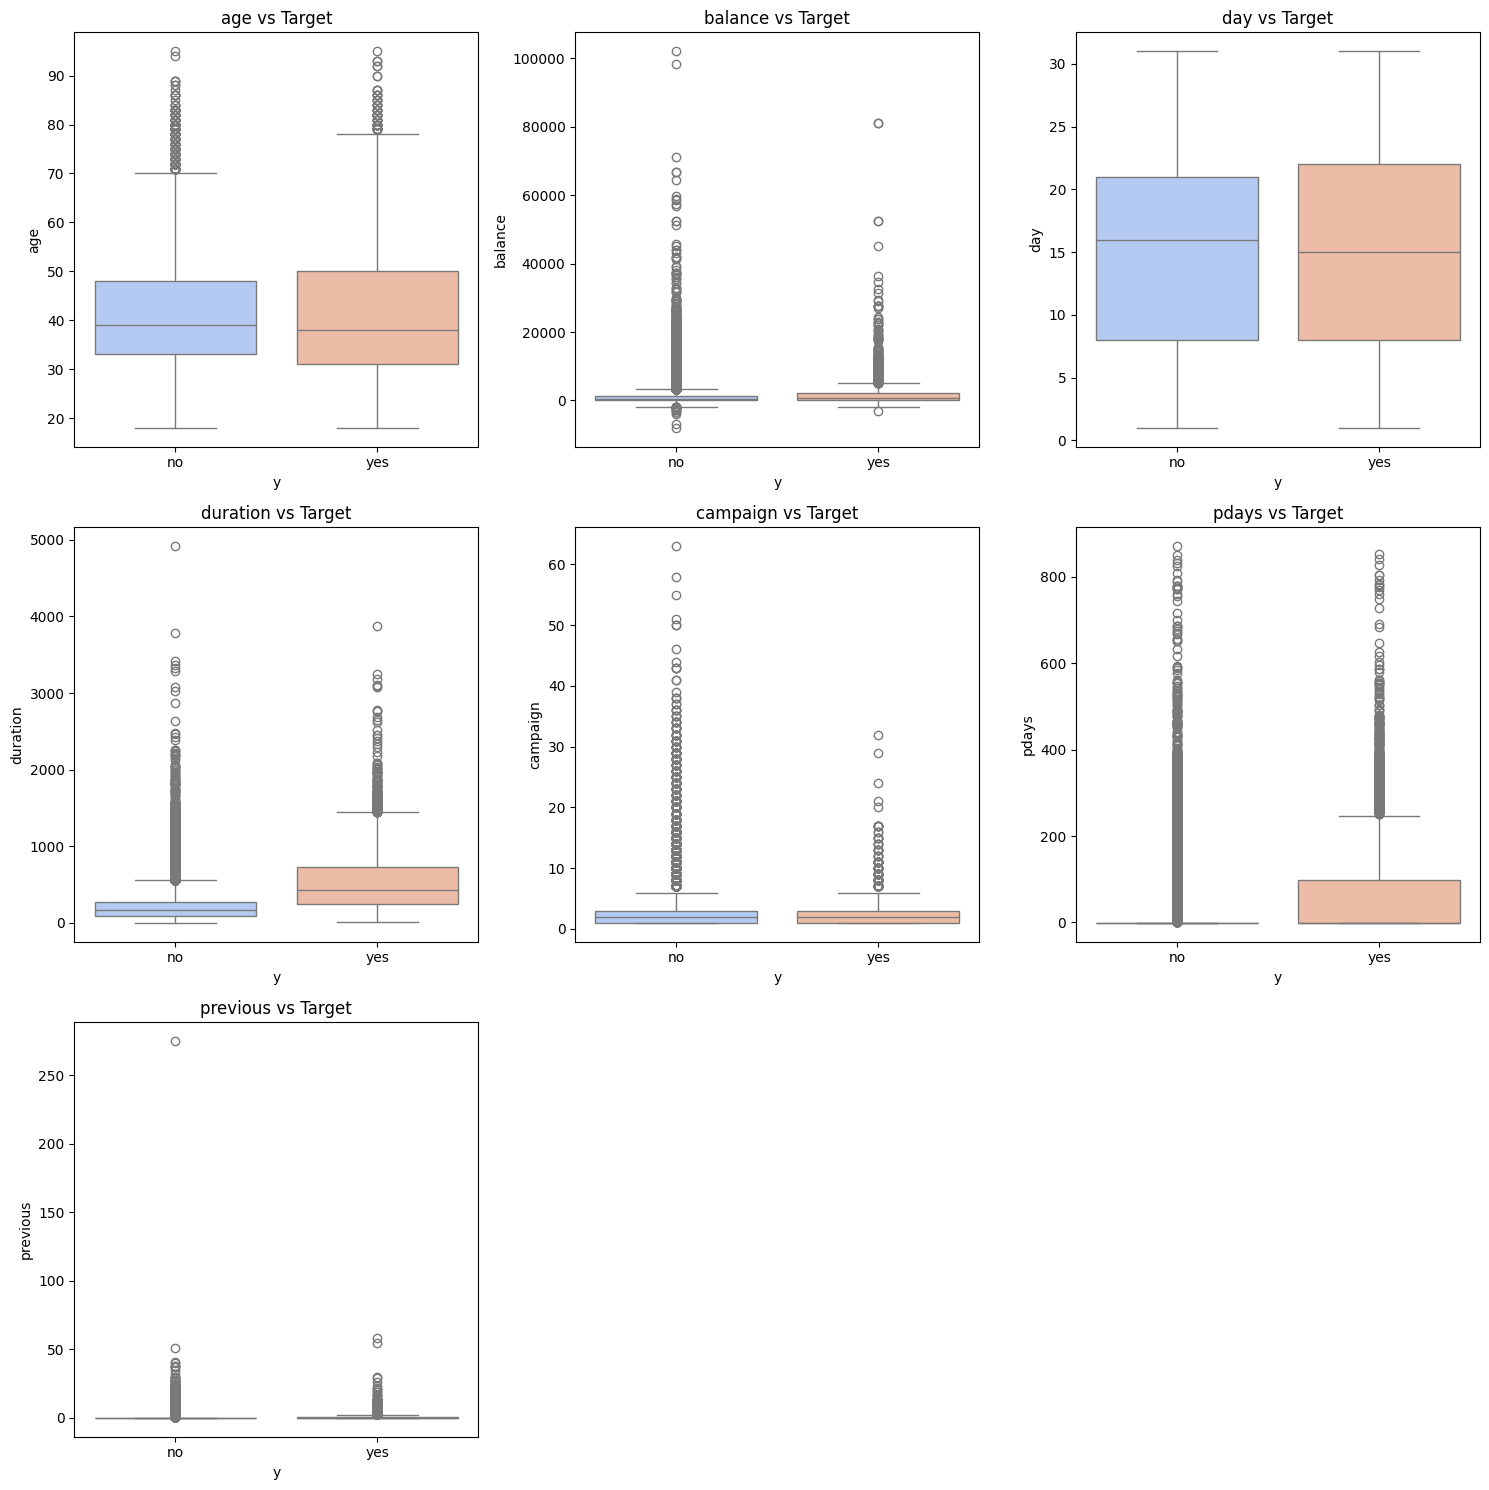

In [ ]:
# Create subplots dynamically
rows = math.ceil(len(numerical_features) / 3)
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))
axes = axes.flatten()

# Plot relationships for numerical features
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=bank_data, x='y', y=feature, ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"{feature} vs Target")
    axes[i].set_xlabel("y")
    axes[i].set_ylabel(feature)

# Turn off unused axes
for j in range(len(numerical_features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Numerical Features: Correlation with Target

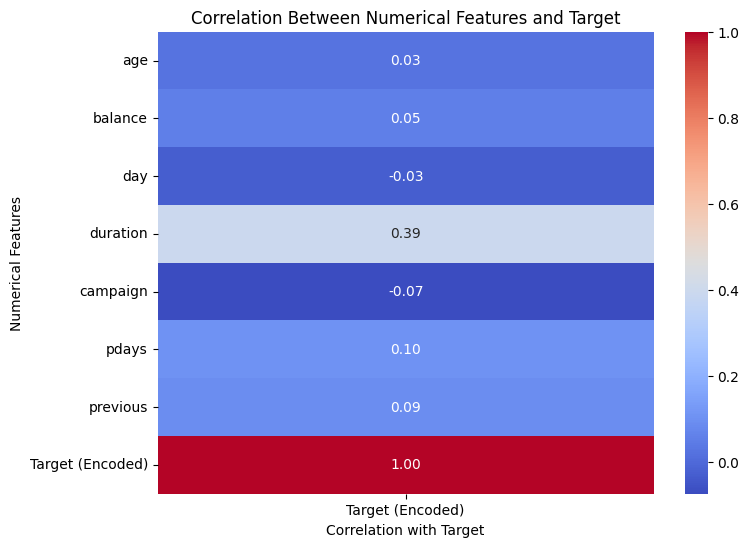

In [ ]:
# Encode the target variable as binary
target_encoded = bank_data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Create a new DataFrame with numerical features and the encoded target
numerical_with_target = bank_data[numerical_features].copy()
numerical_with_target['Target (Encoded)'] = target_encoded

# Compute the correlation matrix
numerical_corr = numerical_with_target.corr()

# Extract only correlations with the target variable
target_correlation = numerical_corr[['Target (Encoded)']]

# Visualize the correlation as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    target_correlation,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=True
)
plt.title("Correlation Between Numerical Features and Target")
plt.ylabel("Numerical Features")
plt.xlabel("Correlation with Target")
plt.show()


Categorical Features: Association with Target using Cramér's V

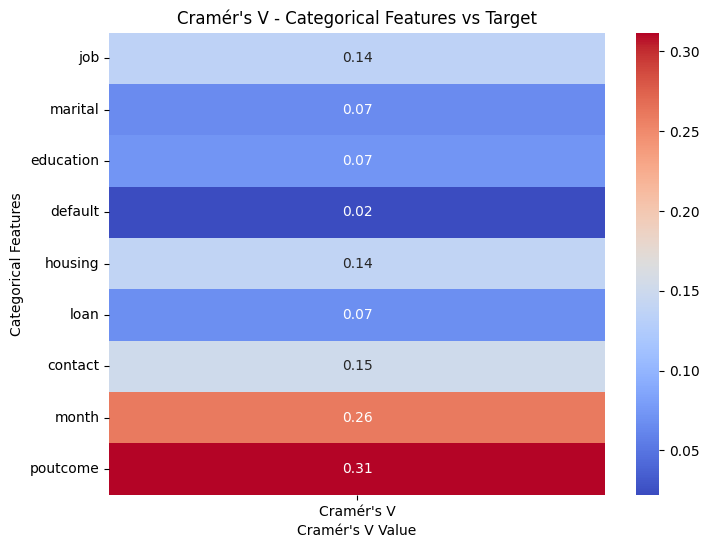

In [ ]:
# Define a function to calculate Cramér's V
def calculate_cramers_v(feature, target):
    contingency = pd.crosstab(feature, target)
    chi2, _, _, _ = chi2_contingency(contingency)
    n = contingency.sum().sum()
    phi2 = chi2 / n
    r, k = contingency.shape
    return np.sqrt(phi2 / (min(k - 1, r - 1))) if chi2 > 0 else 0

# Calculate Cramér's V for each categorical feature
cramers_v_results = {
    feature: calculate_cramers_v(bank_data[feature], bank_data['y'])
    for feature in categorical_cols
}

# Convert the results to a DataFrame for visualization
cramers_v_df = pd.DataFrame.from_dict(cramers_v_results, orient='index', columns=['Cramér\'s V'])
cramers_v_df.index.name = "Categorical Features"

# Plot the results as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cramers_v_df,
    annot=True,
    cmap='coolwarm',
    cbar=True,
    fmt=".2f"
)
plt.title("Cramér's V - Categorical Features vs Target")
plt.xlabel("Cramér's V Value")
plt.ylabel("Categorical Features")
plt.show()
